In [92]:
import nltk
# from lxml import etree
from bs4 import BeautifulSoup
import pandas as pd
from glob import glob
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 6]
plt.style.use('ggplot')

In [51]:
class Text(): 
    def __init__(self, filename): 
        self.filename = filename
        self.number = filename.split('_')[0][4:]
        with open(filename) as f: 
            self.soup = BeautifulSoup(f, 'lxml')
    
    @property
    def text(self): 
        return self.soup.text
    
    @property
    def numWords(self): 
        return len(self.text.split())
    
    @property
    def titles(self): 
        """ Aggregate titles. """
        titles = self.soup.find_all('title')
        return titles
    
    @property
    def titleDict(self):
        """ Make a dictionary of titles, arranged by type. """
        for title in self.titles: 
            if 'type' not in title.attrs: 
                title.attrs['type'] = 'none'
        dictKeys = list(set([title.attrs['type'] for title in self.titles]))
        titleDict = {key: [] for key in dictKeys}
        for title in self.titles: 
            titleDict[title.attrs['type']].append(title.text.replace('\n', ' '))
        return titleDict
    
    @property
    def titleStats(self): 
        """ Return title stats about this text. """
        statsDict = {}
        for titleType in self.titleDict: 
            statsDict[titleType] = len(self.titleDict[titleType])
        return statsDict

In [52]:
texts = [Text(f) for f in glob('../u*.xml')]

In [65]:
stats = {text.filename[3:-4]: text.titleStats for text in texts}

In [98]:
df = pd.DataFrame(stats).T.fillna(0)

In [99]:
topTitleTypes = df.sum().sort_values(ascending=False)[:7]
topTitleTypes

newspaper      77.0
book           62.0
play           52.0
song           32.0
opera          18.0
magazine        9.0
short story     7.0
dtype: float64

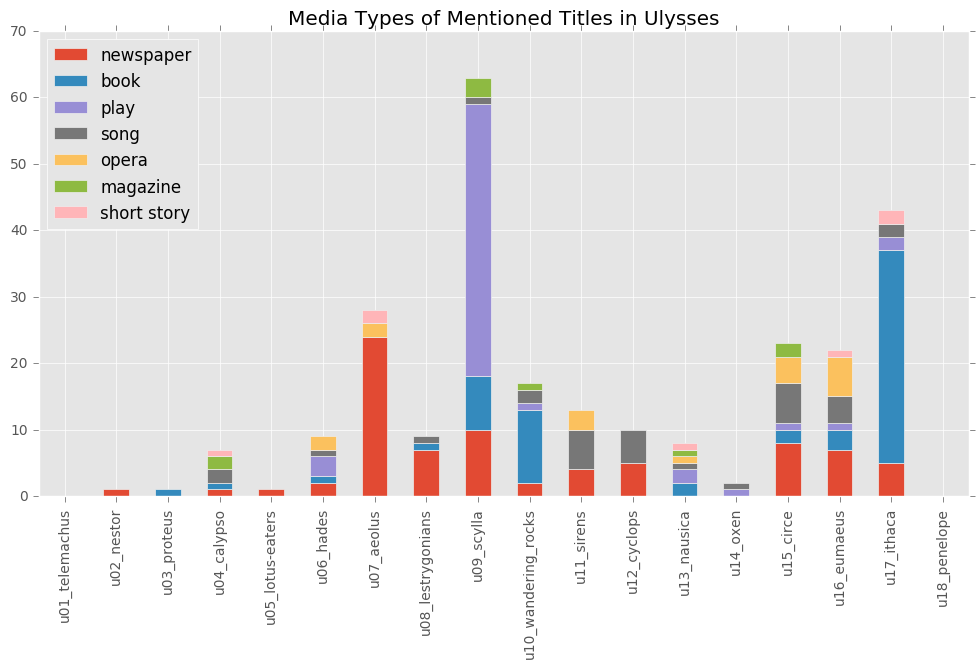

In [101]:
df[list(topTitleTypes.index)].plot(kind="bar", stacked=True, title="Media Types of Mentioned Titles in Ulysses")